**Indiquer dans la boîte ci-dessous vos noms et prénoms**

Double-cliquer ici et remplacer par les noms et prénoms de votre binôme

# 3I026 - Intelligence artificielle & Data science

# TP 3 - Perceptron

L'objectif est d'implanter l'algorithme du perceptron de Rosenblatt, ainsi que quelques extensions, et d'évaluer leurs performances sur des données aléatoires puis réelles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Rappels sur les TPs précédent

In [2]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [3]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [4]:
class ClassifierRandom(Classifier):
    def __init__(self, dim):
        self.w = np.random.rand(dim)

    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1

In [5]:
def plot_frontiere(set, classifier, step=20):
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)

In [6]:
def plot2DSet(dataset):
    plt.scatter(dataset.x[0:int(dataset.size()/2),0],dataset.x[0:int(dataset.size()/2),1],marker='o')
    plt.scatter(dataset.x[int(dataset.size()/2):dataset.size(),0],dataset.x[int(dataset.size()/2):dataset.size(),1],marker='x')

## Étape 1 : Perceptron de Rosenblatt


En héritant de la classe `Classifier`, implanter le perceptron tel que décrit en cours. La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.

In [16]:
class Perceptron(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
        self.dim=input_dimension
        self.lg_rate=learning_rate
        self.nbr_it=nombre_iterations
        self.w=np.random.rand(self.dim+1)
        self.labeledset=None
    
    def train(self, labeledset):
        
        self.labeledset=labeledset
        list_acc=[]
        list_it=[]
        ls=np.arange(labeledset.size())
        np.random.shuffle(ls)
        
        for i in range(self.nbr_it):
            
            for j in ls:
                
                if(self.labeledset.getY(j)*self.predict(self.labeledset.getX(j))<0):
                    
                    self.w = self.w + self.lg_rate*self.labeledset.getY(j)*np.hstack((self.labeledset.getX(j),[-1]))

            
            if(i%10==0):
                list_acc.append(self.accuracy(self.labeledset))
                list_it.append(i)
        
        print(self.w)
        plt.subplot(121)
        plt.plot(list_it,list_acc)
        
        plt.subplot(122)
        plot_frontiere(self.labeledset,self,20)
        plot2DSet(self.labeledset)
        
    def predict(self, x):
        
        scalar = np.dot(self.w, np.hstack((x,[-1])))

        if(scalar >= 0):
            return 1     
        return -1
        
        

La méthode `train` devra faire un nombre d'itérations fixées à la création de l'objet.

Pour pouvoir évaluer la qualité de l'apprentissage au cours des itérations, on évaluera régulièrement (par exemple toutes les 10 itérations) l'accuracy du modèle, sur un ensemble de validation (un sous-ensemble de l'ensemble d'apprentissage). 

Après chaque apprentissage, on veillera à tracer la courbe d'apprentissage, c'est à dire le score obtenu au cours des itérations, et à tracer la frontière de décision.

Tester votre code sur des données aléatoires.

[  193.29983345 -8428.08178686 -9499.45478412]


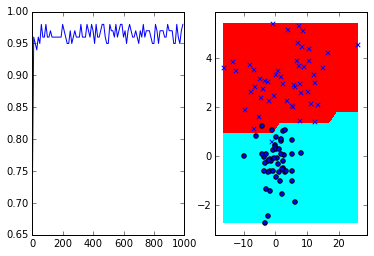

In [17]:
the_set = LabeledSet(2)
gauss1=np.random.multivariate_normal([0,0],[[10,0],[0,1]],size=50)
gauss2=np.random.multivariate_normal([0,3],[[100,0],[0,1]],size=50)

for i in gauss1:
    the_set.addExample(i,1)

for i in gauss2:
    the_set.addExample(i,-1)
    

percep_test=Perceptron(2,100,1000)
percep_test.train(the_set)




**Questions**
- Comment choisir le nombre d'itérations ?
- Quelle est l'influence du paramètre `learning_rate`
- Que se passe-t-il si le nombre d'exemple d'apprentissage est faible ?

## Étape 2: Données XOR

Générer une base de données, appelée XOR par la suite, contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à des exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à des exemples négatifs

[-0.09940881  0.09327279  0.29259533]


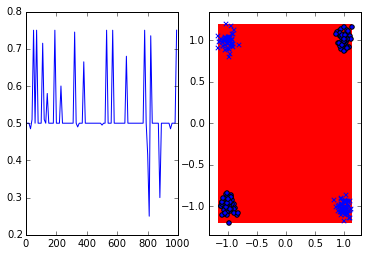

In [141]:
the_setxor = LabeledSet(2)
gauss1=np.random.multivariate_normal([-1,-1],[[0.005,0],[0,0.005]],size=50)
gauss2=np.random.multivariate_normal([1,1],[[0.005,0],[0,0.005]],size=50)
gauss3=np.random.multivariate_normal([-1,1],[[0.005,0],[0,0.005]],size=50)
gauss4=np.random.multivariate_normal([1,-1],[[0.005,0],[0,0.005]],size=50)

for i in gauss1:
    the_setxor.addExample(i,1)
    
for i in gauss2:
    the_setxor.addExample(i,1)

for i in gauss3:
    the_setxor.addExample(i,-1)
    
for i in gauss4:
    the_setxor.addExample(i,-1)
    


percep_xor=Perceptron(2,0.5,1000)
percep_xor.train(the_setxor)

**Questions**
- Que se passe-t-il quand on apprend un perceptron ?
- Quel est le problème ?

Le perceptron n'est pas bon sur ce type de base de donnée.
Ceci est du au fait que les données sont symétriques par rapport à un point et pas par rapport à une droite donc déterminer une frontiere linéaire est impossible.

## Étape 4: Protocole expérimental

Attention, lorsque vous testez un classifieur, il est nécessaire de considérer à la fois un ensemble d'apprentissage et un ensemble de test. La performance doit être évaluée sur l'ensemble de test (et non pas sur l'ensemble d'apprentissage).

Évaluer les performances du perceptron selon différentes valeurs des hyper-paramètres (*learning rate*, nombre d'itérations), tracer les courbes d'apprentissage et les frontières de décisions. Commenter.

Tracer des courbes indiquant les performances en fonction des hyper-paramètres. Commenter.

## Étape 5 : données réelles UCI

In [142]:
from sklearn.datasets import fetch_mldata

def loadFile(name):
    data = fetch_mldata(name, data_home='.')
    print(data.data.shape)
    unique=np.unique(data.target)
    for i in range(len(data.target)):
        if (data.target[i]==unique[0]):
            data.target[i]=1
        else:
            data.target[i]=-1
            
loadFile('breast-cancer_scale')
#Les donnees sont dans data.data et data.target

(683, 10)


Sur ces données réelles, évaluer les performances du perceptron, selon la valeur des hyper-paramètres et comparer aux performances de $k$-NN (avec plusieurs valeurs de $k$. Réfléchir à une façon de choisir la meilleur valeur des hyper-paramètres.

# Kernel biais

In [143]:
class Kernelbiais(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
        self.dim=input_dimension
        self.lg_rate=learning_rate
        self.nbr_it=nombre_iterations
        self.w=np.random.rand(self.dim+3)
        self.labeledset=None
        
    def transform(self, x):
        return np.append(x, [x[0]*x[1], x[0]*x[0], x[1]*x[1]])
        
    
    def train(self, labeledset):
        
        self.labeledset=labeledset
        
        list_acc=[]
        list_it=[]
        ls=np.arange(labeledset.size())
        np.random.shuffle(ls)
        
        
        
        for i in range(self.nbr_it):
            
            for j in ls:
                point = self.labeledset.getX(j)
                point2 = self.transform(point)
                
                
                if(self.labeledset.getY(j)*self.predict(point)<0):
                    
                    #self.w = self.w + self.lg_rate*self.labeledset.getY(j)*np.hstack((point,[-1]))
                    self.w = self.w + self.lg_rate*self.labeledset.getY(j)*point2
            
            if(i%10==0):
                list_acc.append(self.accuracy(self.labeledset))
                list_it.append(i)
        
        print(self.w)
        plt.subplot(121)
        plt.plot(list_it,list_acc)
        
        plt.subplot(122)
        plot_frontiere(self.labeledset,self,20)
        plot2DSet(self.labeledset)
        
    def predict(self, x):
        
        scalar = np.dot(self.w, self.transform(x))
        if(scalar >= 0):
            return 1     
        return -1

[ 0.24205047  0.0464225   1.98505798 -0.23034016 -0.22140406]


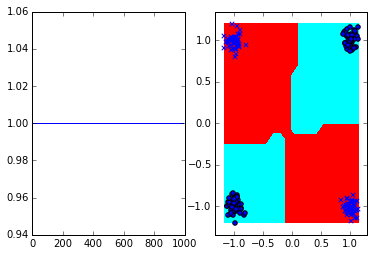

In [144]:
ker_xor=Kernelbiais(2,0.5,1000)
ker_xor.train(the_setxor)